In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline - giving instruction to include all plots inline.
%matplotlib inline 
#sklearn  Scikit LIbral ML)
# standardscaler - standardizes the data- makes all the features unitless (similar to normalization)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn import datasets, svm 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, svm 
from sklearn.svm import SVC

In [52]:
cnt = 0
input=[[]]


# Coronary Heart Disease

MLP: 0.9713333333333334


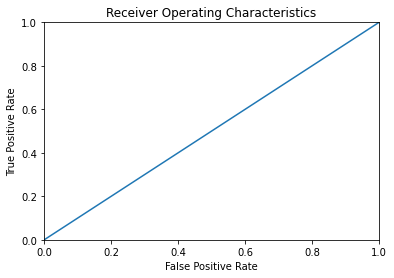

SVM: 0.963
KNN Classifier: 0.9693333333333334
[0]


In [54]:
# read excel files from the folder
A=pd.read_csv('D:\datasets\cvd_dataset_.csv',header=0) 
# X Y split
X=A.drop(['id','age','gender','cardio'],axis=1)# two brackets needed to fetch more than one column
Y=A['cardio']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=4);




# Z Score Standardization
S=StandardScaler()
S.fit(A)
xtrain=S.fit_transform(xtrain)
xtest=S.fit_transform(xtest)

#MLP Classifier
model=MLPClassifier(hidden_layer_sizes=(128,128,128),activation='tanh',solver='sgd', alpha=0.0001, batch_size='auto' , learning_rate='constant', learning_rate_init=0.001, max_iter=200)# MLP model definition
model.fit(xtrain,ytrain)# fitting the model to our data
y_predict=model.predict(xtest)


y_predict.shape
acc=metrics.accuracy_score(ytest,y_predict)# accuracy calculation
print('MLP:',acc)


cm=metrics.confusion_matrix(ytest,y_predict)

sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])


# ROC Plotting
fpr,tpr, _=roc_curve(ytest,y_predict)
roc_auc=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()


#SVM Quadratic Kernel
model_quad=SVC(kernel='sigmoid')
model_quad.fit(xtrain, ytrain)
pred_quad=model_quad.predict(xtest)
acc=metrics.accuracy_score(ytest,pred_quad)# accuracy calculation
print('SVM:',acc)

#KNN Classifier

#Instatntiate Learning model (k=3)
classifier = KNeighborsClassifier(n_neighbors=3)

#Fitting the model
classifier.fit(xtrain,ytrain)

#predicting the test set results
y_knn=classifier.predict(xtest)
acc=metrics.accuracy_score(ytest,y_knn)# accuracy calculation
print('KNN Classifier:',acc)


new_output = model.predict([input[0]])
print(new_output)


if new_output==1: cnt+=1

# Bronchiectasis

In [55]:

from sklearn.neighbors import KNeighborsClassifier

A1=pd.read_csv('D:\datasets\Exasens.csv',header=0) # read excel files

# X Y split
X1=A1.drop(['Diagnosis'],axis=1)# two brackets needed to fetch more than one column
Y1=A1['Diagnosis']
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,Y1,test_size=.2,random_state=4);

# Z Score Standardization
S1=StandardScaler()
#S1.fit(A1)
xtrain1=S1.fit_transform(xtrain1)
xtest1=S1.fit_transform(xtest1)

# MLP Classifier
model1=MLPClassifier(hidden_layer_sizes=(128,128,128),activation='tanh',solver='sgd', alpha=0.0001, batch_size='auto' , learning_rate='constant', learning_rate_init=0.001, max_iter=1000)# MLP model definition

model1.fit(xtrain1,ytrain1)# fitting the model to our data
y_predict1=model1.predict(xtest1)

acc1=metrics.accuracy_score(ytest1,y_predict1)# accuracy calculation
print('MLP:',acc1)

cm1=metrics.confusion_matrix(ytest1,y_predict1)

sensitivity1=cm1[1,1]/(cm1[1,0]+cm1[1,1])
specificity1=cm1[0,0]/(cm1[0,0]+cm1[0,1])

#SVM Quadratic Kernel
model_quad1=SVC(kernel='sigmoid')
model_quad1.fit(xtrain1, ytrain1)
pred_quad1=model_quad1.predict(xtest1)
acc1=metrics.accuracy_score(ytest1,pred_quad1)# accuracy calculation
print('SVM:',acc1)


#KNN Classifier

#Instatntiate Learning model (k=3)
classifier1 = KNeighborsClassifier(n_neighbors=6)

#Fitting the model
classifier1.fit(xtrain1,ytrain1)

#predicting the test set results
y_knn1=classifier1.predict(xtest1)
acc11=metrics.accuracy_score(ytest1,y_knn1)# accuracy calculation
print('KNN classifier:',acc11)

output1=classifier1.predict([input[1]])
print(output1)


diease_array = ['Bronchiectasis','COPD']
if output1[0] in diease_array: cnt+=1
print(cnt)    




MLP: 0.8537906137184116
SVM: 0.8068592057761733
KNN classifier: 0.9620938628158845
['Bronchiectasis']
1


In [56]:
def check(arr):
    counting_variable = 0
    oxy_sat = arr[0]
    heart = arr[1]
    resp = arr[2]
    sugar = arr[3]
    
 #Hypoxemia    
    if oxy_sat<96: 
        print("Hypoxemia is detected")
        counting_variable+=1
        
 # Moderate Acute Asthma        
    if((oxy_sat>=92 and oxy_sat<=95) and (heart>=100 and heart<=125) and (resp>=20 and resp<=30)): 
        print("Moderate Acute Asthma is detected")
        counting_variable+=1
        
 # Diabetes and Prediabetes      
    if sugar>139: 
        counting_variable+=1
        if sugar>139 and sugar<200:
            print("Prediabetes is detected")
        else:
            print("Diabetes is detected")
            
        
        
    return counting_variable

    

In [57]:
out = check(input[2])
print(out)

0


In [58]:
if out > 0: cnt += out
    
print(cnt)

1


In [59]:
if cnt > 0:
    detect = "Bad"
else:
    detect = "Good"
    

In [60]:
print(detect)

Bad


In [61]:
import pickle
pickle.dump(detect,open('sustainability_and_wellness.pkl','wb'))

In [62]:
#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))    